In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:

from google.colab import files
 
 
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings.csv']))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Performing Data Cleaning and Data Preprocessing

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
m=df['agent'].mean()
df['agent']=df['agent'].fillna(m)

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [10]:
df['children'].fillna(0,inplace=True)

In [11]:
df['country'].fillna(np.NaN, inplace=True)

In [12]:
pd.set_option('display.max_rows',None)

In [13]:
pd.reset_option('display.max_rows')

In [14]:
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [15]:
df['company'].fillna(0,inplace=True)

In [16]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [17]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [18]:
filter=(df['children']==0) &(df['babies']==0) & (df['adults']==0) #Misleading Data

In [19]:
false_data=df[filter]

In [20]:
df=df[~filter]

In [21]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


# Q1 Where do the guest come from and perform spatial analysis

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
df.country.value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [24]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [25]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [26]:
Resort_Hotel=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]

In [27]:
City_Hotel=(df[(df['hotel']=='City Hotel')& (df['is_canceled']==0)])

In [28]:
Resort_Hotel.country.nunique()

118

([<matplotlib.patches.Wedge at 0x7f5f9b7199d0>,
 [Text(0.47699128399824964, 0.9912009458175982, 'PRT'),
  Text(-1.0673044203912203, 0.2661978103091038, 'GBR'),
  Text(-0.8045920149081692, -0.7500877878928657, 'ESP'),
  Text(-0.31157615467515354, -1.0549503779030769, 'IRL'),
  Text(0.06384716627465557, -1.0981455000858023, 'FRA'),
  Text(0.35512300280328263, -1.0410992521753053, 'DEU'),
  Text(0.5397504295146488, -0.958472469004067, 'CN'),
  Text(0.6489542613181427, -0.8881769906482738, 'NLD'),
  Text(0.7305439559984678, -0.8223779717101553, 'USA'),
  Text(0.7997812078536358, -0.7552152140709161, 'BEL'),
  Text(0.8607590721260028, -0.6849042413014996, 'ITA'),
  Text(0.9115238178466152, -0.6157307280770798, 'BRA'),
  Text(0.9533745512617838, -0.5487048068008812, 'CHE'),
  Text(0.988451306360312, -0.48266345931155047, 'POL'),
  Text(1.014706500373437, -0.42470073946237985, 'SWE'),
  Text(1.032728152263302, -0.37877772310792784, 'AUT'),
  Text(1.0454782830231244, -0.34201631500122914, 'ROU

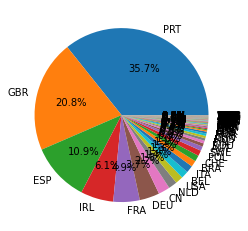

In [29]:
label=Resort_Hotel.country.value_counts().index
plt.pie(Resort_Hotel.country.value_counts(), autopct='%1.1f%%', labels=label)

In [30]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [31]:
trace=go.Pie(labels=label, values=Resort_Hotel.country.value_counts(),
               hoverinfo='label+percent', textinfo='value'
               )

In [32]:

iplot([trace])

In [33]:
country_wise_Data = df[df['is_canceled']==0]['country'].value_counts().reset_index()

In [34]:
country_wise_Data.columns=['country','No of passengers']

In [35]:
px.choropleth(data_frame=country_wise_Data, locations=country_wise_Data.country, color=country_wise_Data['No of passengers'], hover_name=country_wise_Data.country  )

In [36]:
Resort_Hotel=Resort_Hotel.country.value_counts().reset_index()

In [37]:
Resort_Hotel.columns=['country','No of Passengers']

In [38]:
px.choropleth(data_frame=Resort_Hotel, locations=Resort_Hotel.country, color=Resort_Hotel['No of Passengers']  )

In [39]:
City_Hotel=City_Hotel.country.value_counts().reset_index()

In [40]:
City_Hotel.columns=['country','No of Passengers']

In [41]:
px.choropleth(data_frame=City_Hotel, locations=City_Hotel.country, color=City_Hotel['No of Passengers']  )

How much does guest pay for a room per night?

---


How does the price of room per night vary over the year?

In [42]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
df2=df[df['is_canceled']==0]

Text(0, 0.5, 'Price')

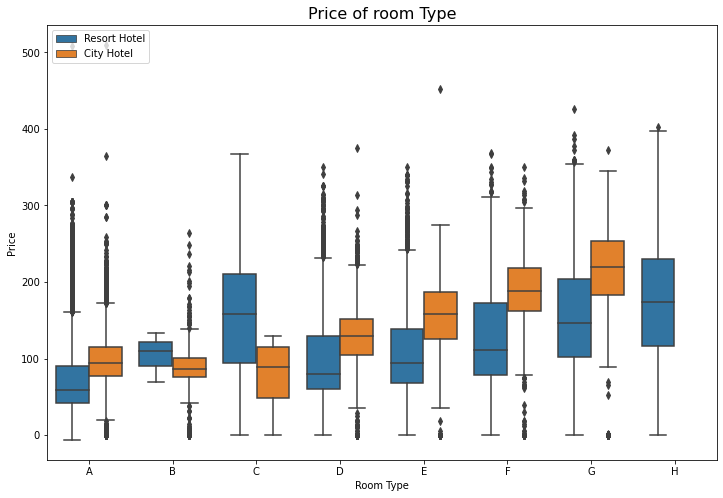

In [44]:
plt.figure(figsize=(12,8))
g=sns.boxplot(x='reserved_room_type',y='adr', data=df2,hue='hotel',order=['A','B','C','D','E','F','G','H'])
g.legend(loc=2)
plt.title('Price of room Type', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Price')

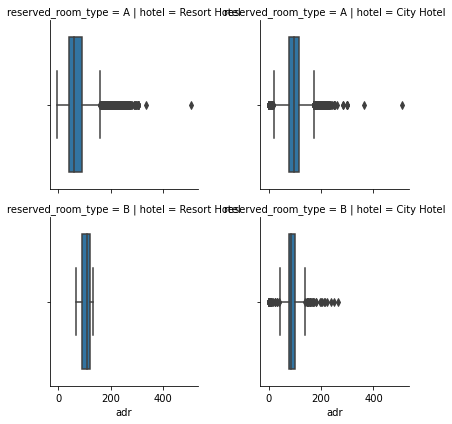

In [45]:
f=sns.FacetGrid(data=df2[df2['reserved_room_type'].isin(['A','B'])], row='reserved_room_type',col='hotel')
f.map_dataframe(sns.boxplot, x='adr')

In [46]:
df1=df[df['is_canceled']==0]

In [47]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [48]:
Month=df1.groupby(df1['arrival_date_month'])['adr'].mean().reset_index()

In [49]:
Month

,arrival_date_month,adr
0,April,97.931649
1,August,142.290603
2,December,79.232330
3,February,72.577923
4,January,67.108296
5,July,129.427889
6,June,114.721068
7,March,77.608690
8,May,104.962224
9,November,70.708235


In [50]:
Month.arrival_date_month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

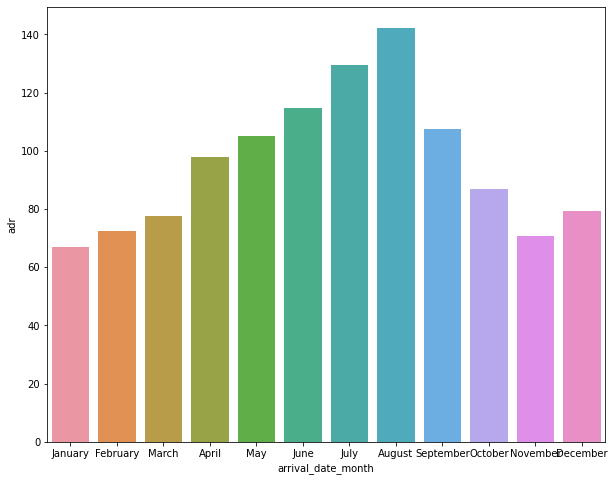

In [51]:
plt.figure(figsize=(10,8))
orders=['January','February',"March",'April','May','June','July','August','September','October','November','December']
sns.barplot(data=Month,x='arrival_date_month',y='adr',order=orders)

In [52]:
!pip install sorted_months_weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=dfa9440723bad73ad2046eb7b7eaa5a52c6fc8af4738cdf0ebc9ee12a878eef1
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [53]:
!pip install sorted_months_weekdays
!pip install sort_dataframeby_monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=85800b657fad3c6d0967efcfac478c388ce66d91ba55057a4266a8dc65a938f5
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [54]:
import sort_dataframeby_monthorweek as sd

In [55]:
Month=sd.Sort_Dataframeby_Month(Month,'arrival_date_month')

In [56]:
Month

,arrival_date_month,adr
0,January,67.108296
1,February,72.577923
2,March,77.608690
3,April,97.931649
4,May,104.962224
5,June,114.721068
6,July,129.427889
7,August,142.290603
8,September,107.390813
9,October,86.993768


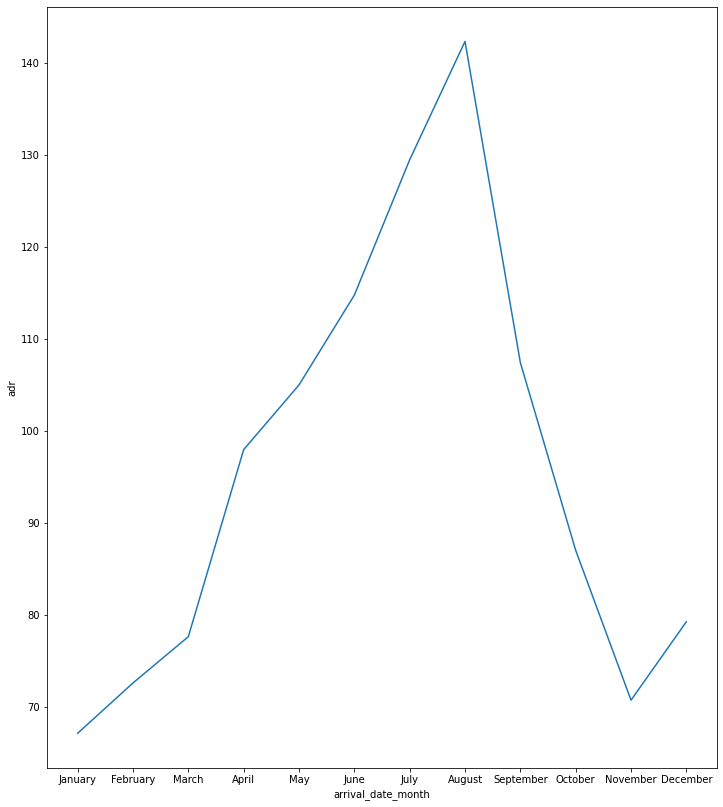

In [57]:
plt.figure(figsize=(12,14))

sns.lineplot(data=Month,x='arrival_date_month',y='adr', )

Distribution of nights spend at hotel by market segment and hotel type

---


Analyzing preferences of guest and what they prefer

---



In [58]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [59]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


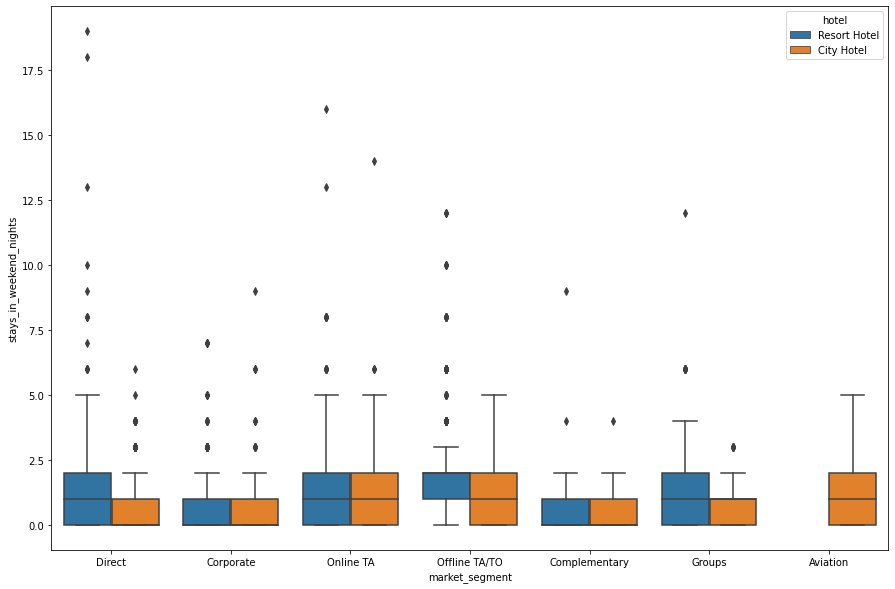

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment',y='stays_in_weekend_nights',data=df1,hue='hotel')

In [61]:
px.pie(data_frame=df1,values=df1.meal.value_counts(),names=df1.meal.value_counts().index,hole=0.5)

Analyze special request done by customers

---


Create pivot table of relationship between special request and cancellation booking

In [62]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [63]:
df1.total_of_special_requests.value_counts()

0    36667
1    25867
2    10086
3     2049
4      304
5       38
Name: total_of_special_requests, dtype: int64

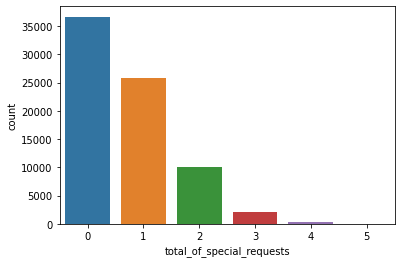

In [64]:
sns.countplot(data=df1,x='total_of_special_requests')

Which are the most busy months?

In [80]:
Monthly=df1.arrival_date_month.value_counts().reset_index()

In [83]:
Monthly.columns=['Month','Count']
Monthly

,Month,Count
0,January,4115
1,February,5359
2,March,6620
3,April,6560
4,May,7103
5,June,6395
6,July,7907
7,August,8624
8,September,6385
9,October,6901


In [84]:
Monthly=sd.Sort_Dataframeby_Month(Monthly,'Month')

In [85]:
Monthly

,Month,Count
0,January,4115
1,February,5359
2,March,6620
3,April,6560
4,May,7103
5,June,6395
6,July,7907
7,August,8624
8,September,6385
9,October,6901


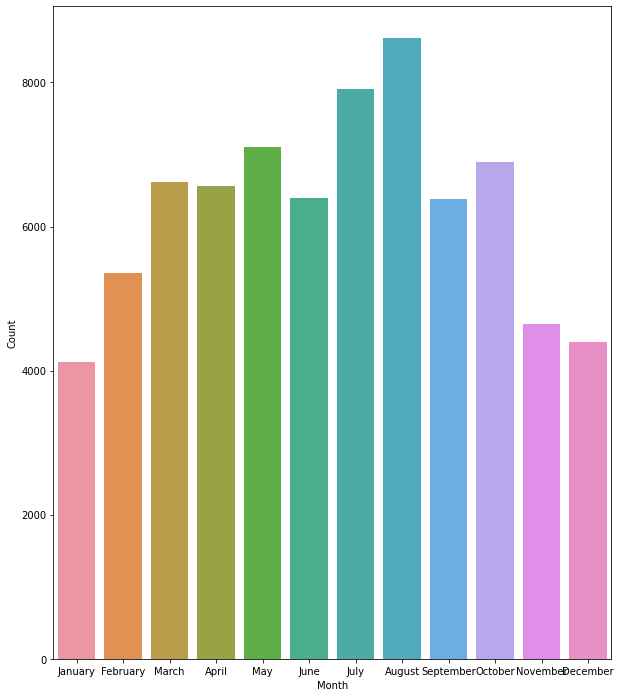

In [93]:
plt.figure(figsize=(10,12))
sns.barplot(data=Monthly,x='Month',y='Count')

In [94]:
px.line(data_frame=Monthly, x='Month', y='Count')

How long do people stay at hotels?


---

Boookings by market segment


In [98]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [102]:
df1['Total_nights']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']

In [103]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,7


In [101]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [109]:
st=df1.groupby(['Total_nights','hotel']).count().reset_index()


In [112]:
st=st.iloc[:,0:3]

In [113]:
st.columns=['Night','Hotel','No of stays']

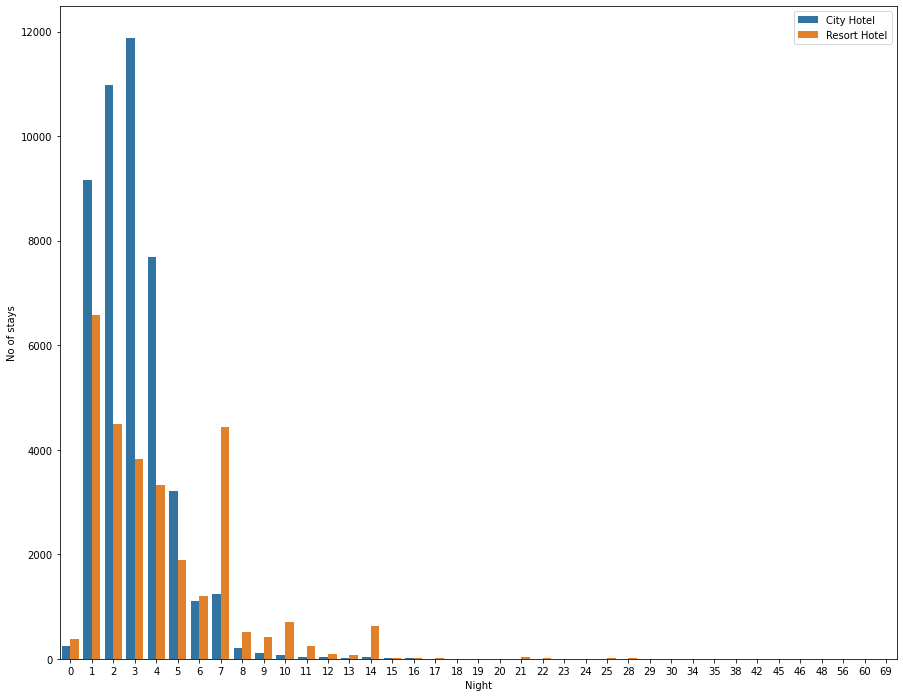

In [118]:
plt.figure(figsize=(15,12))
t=sns.barplot(x='Night',y='No of stays', data=st, hue='Hotel')
t.legend(loc=1)

In [126]:
df2=df1.market_segment.value_counts().reset_index()
df2

,index,market_segment
0,Online TA,35673
1,Offline TA/TO,15880
2,Direct,10648
3,Groups,7697
4,Corporate,4291
5,Complementary,639
6,Aviation,183


In [128]:
px.pie(data_frame=df1,names=df1['market_segment'].value_counts().index,values=df1['market_segment'].value_counts())

Price per night and person based on booking and room

---

How many bookings were cancelled

---
which month have highest no. of cancellations


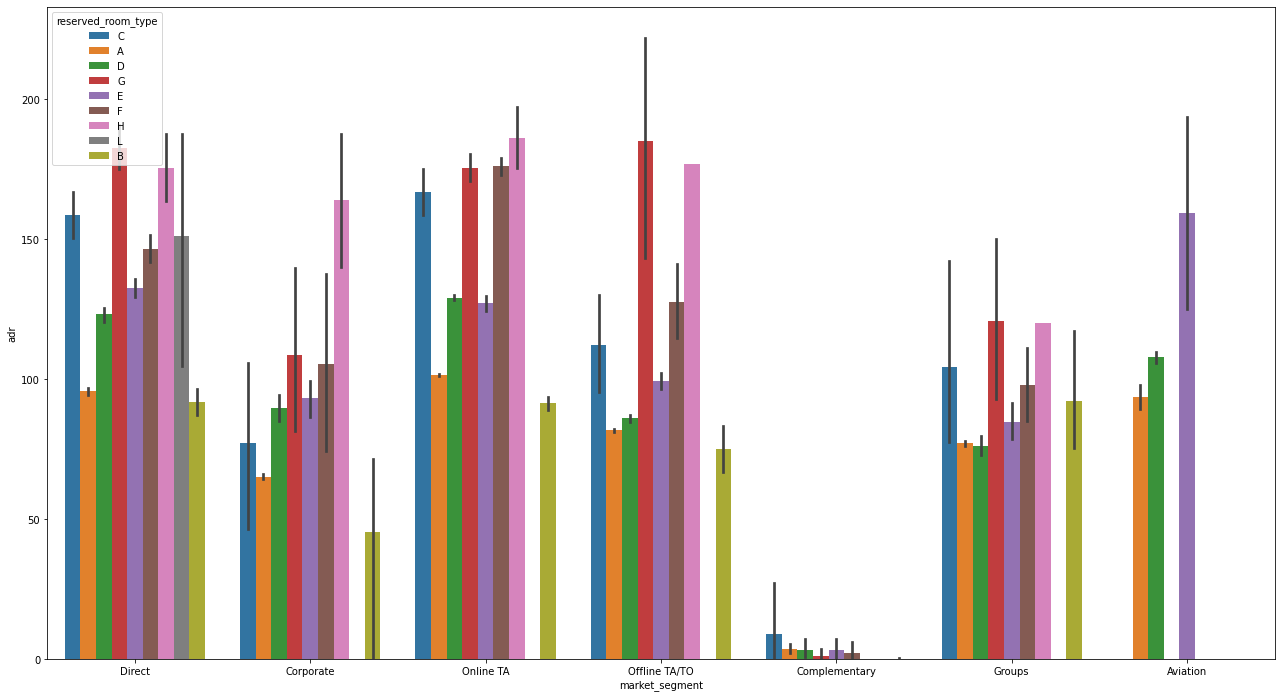

In [139]:
plt.figure(figsize=(22,12))
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type', data=df1)

In [141]:
cancel=df[df['is_canceled']==1]

In [143]:
cancel.groupby('is_canceled')['hotel'].value_counts()

is_canceled  hotel       
1            City Hotel      33079
             Resort Hotel    11120
Name: hotel, dtype: int64

In [147]:
px.pie(data_frame=cancel,values=cancel.groupby('is_canceled')['hotel'].value_counts(),names=['Resort Hotel', 'City hotel'])

In [152]:
cancel_months=cancel.arrival_date_month.value_counts().reset_index()
cancel_months.columns=['Month','No of Cancellations']
cancel_months

,Month,No of Cancellations
0,August,5237
1,July,4737
2,May,4677
3,June,4534
4,April,4518
5,October,4246
6,September,4115
7,March,3148
8,February,2693
9,December,2368


In [153]:
cancel_months=sd.Sort_Dataframeby_Month(cancel_months,'Month')

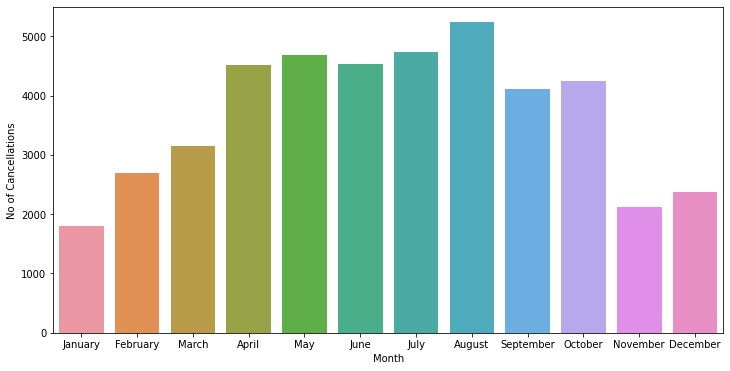

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(data=cancel_months, x='Month',y='No of Cancellations')

How many percent of guests were repeating?

In [135]:
df1.is_repeated_guest.value_counts()
label=['Yes','No']
px.pie(data_frame=df1, values=df1['is_repeated_guest'].value_counts(),names=df1['is_repeated_guest'].value_counts().index,labels=label)